In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The dataset comprises of 13 columns described as:
1. Age
2. Sex 1-male 0-female
3. Chest Pain type
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. esting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df = df.rename(columns= {'cp':'chest_pain_type','trestbps':'resting_BP','chol':'serum_cholestoral','fbs':'fasting_blood_sugar','restecg':'resting_ECG',
                                     'thalach':'max_heart_rate','exang':'exercise_induced_angina',
                                     'ca':'major_vessels_count','thal':'thalium_stress'})
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_BP', 'serum_cholestoral',
       'fasting_blood_sugar', 'resting_ECG', 'max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope', 'major_vessels_count',
       'thalium_stress', 'target'],
      dtype='object')

In [5]:
#Checking and visualizing the number of people with heart disease
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

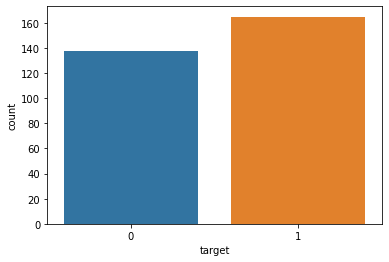

In [6]:
sns.countplot(df['target'])

Now checking presence of heart disease based of individual features to identify if any partifular feature relates to heart disease 

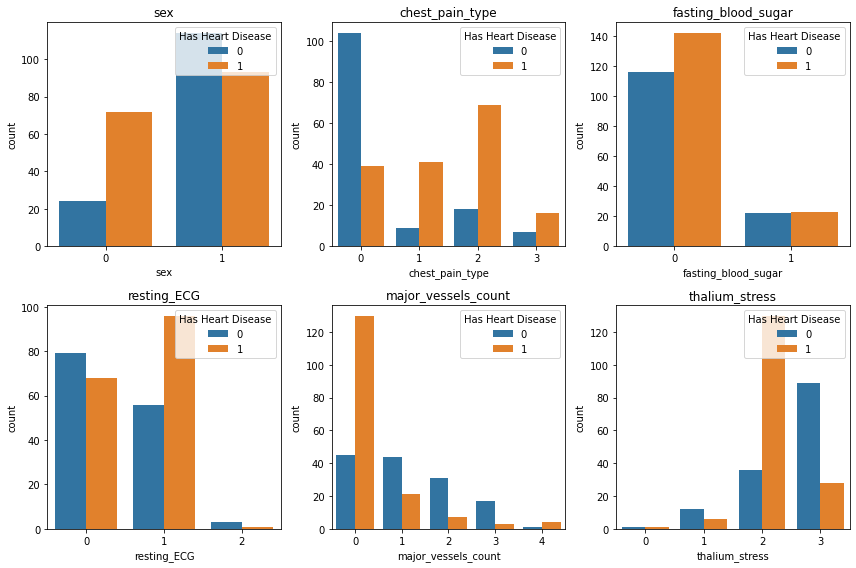

In [7]:
cols = [ 'sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_ECG', 'major_vessels_count', 'thalium_stress']

n_rows = 2
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols*4, n_rows*4))

for r in range(0, n_rows):
    for c in range(0,n_cols):
        i = r*n_cols +c  # setting index to go through each columns
        ax = axs[r][c]   # Just to show where to position each of the 4 subplots
        
        #Creating subplots - using i to loop though each of the 4 columns we created
        sns.countplot(df[cols[i]], hue = df['target'], ax = ax)
        
        # Setting title for each chart
        ax.set_title(cols[i])
        
        #Setting legend for each chart
        ax.legend(title = 'Has Heart Disease', loc = 'upper right')
plt.tight_layout()

As seen in the Charts:
1. Heart disease rate among females is high
2. Possibilty of heart disease increases witt chest pain types and is highest for chest pain type 2 and 3
3. Among those with fasting blood sugar greater than 120, there is no significant relation with heart disease
4. Possibility of heart disease is highest for resting ecg type 1
5. cavalues 0 has highest rate of heart disease
6. Thak values 2 corresponds to fixed defects and has highest heart disease rate

In [8]:
# Checking for null values in dataset
df.isnull().sum()


age                        0
sex                        0
chest_pain_type            0
resting_BP                 0
serum_cholestoral          0
fasting_blood_sugar        0
resting_ECG                0
max_heart_rate             0
exercise_induced_angina    0
oldpeak                    0
slope                      0
major_vessels_count        0
thalium_stress             0
target                     0
dtype: int64

There are no null values in the data, we dont have to conduct any data processing for null values, however, we will check for distribution of column values

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


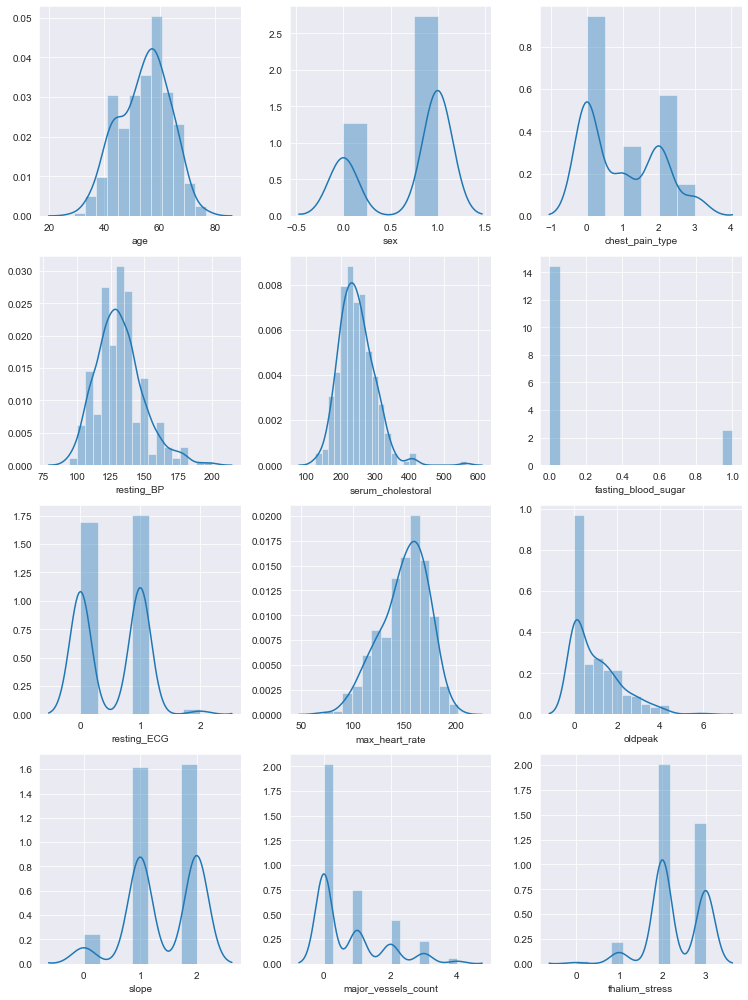

In [9]:
sns.set_style('darkgrid')
cols = ['age', 'sex', 'chest_pain_type', 'resting_BP', 'serum_cholestoral',
       'fasting_blood_sugar', 'resting_ECG', 'max_heart_rate'
       , 'oldpeak', 'slope', 'major_vessels_count',
       'thalium_stress']
n_rows = 4
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0,n_cols):
        i = r*n_cols +c  
        ax = axs[r][c] 
        
        sns.distplot(df[cols[i]], ax = ax)
        
    plt.tight_layout()

The following can be concluded from the distplots above:

1. Age & Resting BP follows normal distribution
2. Serum Cholestoreol shows signs of slight negative skewness
3. Max Heart Rate shows signs of slight positive skewness
4. Oldpeak shows signs of kurtosis

In [ ]:
sns.set_style('darkgrid')
cols = ['age', 'sex', 'chest_pain_type', 'resting_BP', 'serum_cholestoral',
       'fasting_blood_sugar', 'resting_ECG', 'max_heart_rate'
       , 'oldpeak', 'slope', 'major_vessels_count',
       'thalium_stress']
n_rows = 4
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0,n_cols):
        i = r*n_cols +c  
        ax = axs[r][c] 
        
        sns.boxplot(df[cols[i]], ax = ax)
        
    plt.tight_layout()

The boxplots concludes the following:
1. 90% an above patients have chest pain types 0,1,2
2. Mean resting blood pressure is 130, however we see outliers rangin above 180 -200
3. Mean Serum cholesterol is 250, however we have outliers above 400
4. We also have patients with higher major_vessel_counts and oldpeak, and some with lower heart rates

We will not be treating the outliers in the data since there is practical possibilities for these values to exist

Lets also check the target variable across features to see if there is any high correlation

In [ ]:
sns.pairplot(df, height = 3, hue = 'target', diag_kind = 'kde')
plt.figure(figsize=(10,10))
plt.show()

Following can be concluded from pairplot above:

1. Heart Disease is well distributed with age
2. Heart disease is higher among males, however the number of males in the dataset is also high
3. Heart disease is slightly higher among patients with lower serum colesterol
4. Heart disease is higher among patients with higher restin ECG and Heart rate

Lets also check the correlation matrix along with the help of heatmap

In [ ]:
df_correlation = df.corr()
df_correlation

In [ ]:
fig, ax = plt.subplots(figsize = (16,6))
sns.heatmap(df_correlation, annot = True, annot_kws= {'size': 11})

The correlation matrix and heatmap shows that target is directly correlated to chest pain type, max heart rate and slope. All the other variables show negative correlation meaning the possibility of heart disease decraeses with increase in those negatively correlated features.

We will now use PCA to identify the principle components and then use those features to build out model

In [ ]:
#importing model related packages
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.ensemble import *
from sklearn.svm import *

In [ ]:
# splitting the dataframe from the target variable
X = df.drop(['target'], axis =1)
y = df['target']

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
#checking size of test and train data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

In [ ]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
features = X_train.T
cov_matrix = np.cov(features)
print(cov_matrix)

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %eig_vecs)

In [ ]:
eig_vals

In [ ]:
pca = PCA(n_components=7)
pca.fit(X_train)
reduced_data_train = pca.transform(X_train)


In [ ]:
pca = PCA(n_components=7)
pca.fit(X_test)
reduced_data_test = pca.transform(X_test)

In [ ]:
reduced_data_train = pd.DataFrame(reduced_data_train, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7'])
reduced_data_test = pd.DataFrame(reduced_data_test, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7'])
X_train=reduced_data_train
X_test=reduced_data_test

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X_train, y_train)
log.score(X_train,y_train)

In [ ]:
def models(X_train, y_train):
    
    #1st we will use Logistic regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, y_train)

    from sklearn.linear_model import RidgeClassifier
    clf = RidgeClassifier()
    clf.fit(X_train, y_train)
    
    # Using KNeighbors 
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors =5, metric = 'minkowski', p=2)
    knn.fit(X_train,y_train)
    
    # Using SVM (linear kernel)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train,y_train)
    
    # Using SVM (RBF kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train,y_train)
    
    #Use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train,y_train)
    
    #Using Decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)
    
    #Using Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state =0)
    forest.fit(X_train, y_train)

    import xgboost as xgb
    xb = xgb.XGBClassifier(random_state=0)
    xb.fit(X_train,y_train)

    print('[0]Logistic Regression Training Accuracy', log.score(X_train, y_train))
    print('[1]K Nearest Neighbors Regression Training Accuracy', knn.score(X_train, y_train))
    print('[2]SVC Linear Regression Training Accuracy', svc_lin.score(X_train, y_train))
    print('[3]SVC RBF Regression Training Accuracy', svc_rbf.score(X_train, y_train))
    print('[4]Gaussian Regression Training Accuracy', gauss.score(X_train, y_train))
    print('[5]Decision Tree Regression Training Accuracy', tree.score(X_train, y_train))
    print('[6]Random Forest Regression Training Accuracy', forest.score(X_train, y_train))
    print('[7]Ridge Classifier Training Accuracy', clf.score(X_train, y_train))  
    print('[8]XGB Classifier Training Accuracy', xb.score(X_train, y_train)) 
      
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest, clf,xb

In [ ]:
models = models(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix

for i in range(len(models)):
    cm = confusion_matrix(y_test, models[i].predict(X_test))
    
    #Extracting TN, FN, TP, FP
    TN, FN, TP, FP = confusion_matrix(y_test, models[i].predict(X_test)).ravel()
    test_score = (TP + TN)/(TP + TN + FN + FP)
    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i, test_score))
    print()

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier()
vt = VotingClassifier(estimators = [('log',log),("tree",tree),('rc',rc)],voting="hard", flatten_transform=True)
vt.fit(X_train,y_train)
vt.score(X_test, y_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state =0)
gb_clf.fit(X_train,y_train)
gb_score = gb_clf.score(X_test,y_test)
gb_score

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_model.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test,y_pred)